###Introduction to Keras###
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation.
The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers, or write models entirely from scratch via subclasssing.

###Working on the MNIST Dataset###
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

Importing all the libraries and dependencies required for implementation, We would work MNIST database and try to classify correctly using keras

In [15]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Since we are dealing we images, let's also import the Matplotlib scripting layer in order to view the images.

In [16]:
import matplotlib.pyplot as plt

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/datasets/). 

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.

In [17]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.

Let's visualize the first image in the training set using Matplotlib's scripting layer.

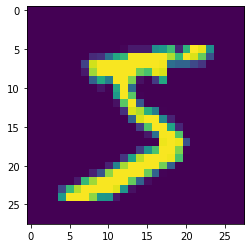

In [20]:
plt.imshow(X_train[0])

###Preprocesing###
With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [21]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.


In [22]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.
You can read more about it [here](https://keras.io/api/utils/)
Also One Hot Encoding might me a new topic for many of you, you can get more info [right here](https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179) 

In [23]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


###Building Model with Keras 
We will first implement only a bare bones model, to just illustrate how keras works.

In [24]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

###Training and Testing

In [28]:
# build the model
model = classification_model()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 24s - loss: 0.1859 - accuracy: 0.9439 - val_loss: 0.0981 - val_accuracy: 0.9697
Epoch 2/10
 - 23s - loss: 0.0784 - accuracy: 0.9763 - val_loss: 0.0682 - val_accuracy: 0.9783
Epoch 3/10
 - 23s - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.0781 - val_accuracy: 0.9753
Epoch 4/10
 - 24s - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0669 - val_accuracy: 0.9798
Epoch 5/10
 - 23s - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.0633 - val_accuracy: 0.9812
Epoch 6/10
 - 23s - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0823 - val_accuracy: 0.9778
Epoch 7/10
 - 23s - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0769 - val_accuracy: 0.9793
Epoch 8/10
 - 24s - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0949 - val_accuracy: 0.9774
Epoch 9/10
 - 24s - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0910 - val_accuracy: 0.9777
Epoch 10/10
 - 23s - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0920 - val_accuracy: 0.9809


Let's print the accuracy and the corresponding error.

In [29]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.98089998960495% 
 Error: 0.01910001039505005


Just running 10 epochs could actually take some time. But enjoy the results as they are getting generated.

Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.

In [30]:
model.save('classification_model.h5')

Since our model contains multidimensional arrays of data, then models are usually saved as .h5 files.
When you are ready to use your model again, you use the load_model function from <strong>keras.models</strong>

In [31]:
from keras.models import load_model
pretrained_model = load_model('classification_model.h5')

In [36]:
pretrained_model.summary() # this function can be used to see the number of parameters in our model and can help in visualising the model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


Using <strong>plot_model</strong> function to present a graphical visualisation.

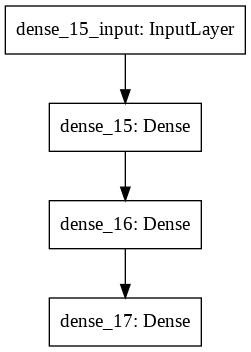

In [37]:
from keras.utils import plot_model
plot_model(pretrained_model, to_file='model.png')

<strong>Now we will move onto implementation of slightly advanced topics</strong>


###Implementing Dropout with Xavier Normal Initialization
The implementation of such concepts in keras may seem pretty straight forward, it is always good practise to know what goes underneath the hood. So we would advise you extensively google the topics and scour the depths of stackoverflow.

In [40]:
#We will the use the previous model with added dropoutand Xavier(Glorot) initialization
from keras.initializers import glorot_normal
from keras.layers import Dropout
def model_dropout():
    model = Sequential()
    initializer = glorot_normal()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,),kernel_initializer=initializer))
    model.add(Dropout(0.2))# 0.2 inside means the fraction of neurons which would be dropped randomly
    model.add(Dense(100, activation='relu',kernel_initializer=initializer))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax',kernel_initializer=initializer))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model2 = model_dropout()
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
# evaluate the model
scores = model2.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 21s - loss: 0.2305 - accuracy: 0.9307 - val_loss: 0.1019 - val_accuracy: 0.9668
Epoch 2/10
 - 20s - loss: 0.1079 - accuracy: 0.9669 - val_loss: 0.0841 - val_accuracy: 0.9731
Epoch 3/10
 - 20s - loss: 0.0806 - accuracy: 0.9749 - val_loss: 0.0787 - val_accuracy: 0.9767
Epoch 4/10
 - 21s - loss: 0.0654 - accuracy: 0.9793 - val_loss: 0.0695 - val_accuracy: 0.9801
Epoch 5/10
 - 21s - loss: 0.0534 - accuracy: 0.9830 - val_loss: 0.0749 - val_accuracy: 0.9800
Epoch 6/10
 - 20s - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0793 - val_accuracy: 0.9791
Epoch 7/10
 - 20s - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0733 - val_accuracy: 0.9797
Epoch 8/10
 - 20s - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.0759 - val_accuracy: 0.9804
Epoch 9/10
 - 20s - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0859 - val_accuracy: 0.9805
Epoch 10/10
 - 19s - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0683 - val_accuracy: 0.9835


The model above may again take some time, but it is worth the wait.


Let's again print the accuracy on the test set and the corresponding error

In [41]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9835000038146973% 
 Error: 0.016499996185302734


As you can see this model works somewhat better than the previous one. The main thing to note here is that machine learning is a lot like alchemy, you have to experiment and experiment until you get the best results. 

This concludes our keras implementation, though not our learning process. A lot of terms would be new here and you should definitley check them out. AL so <strong>play around</strong> with the dataset and the framework until you feel at ease with it.

###All the Best for the Assignment!